In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FASE 1: VISUALIZACIÓN DE DATOS

In [59]:
## La función pd.read_csv() de pandas se utiliza para leer archivos CSV (Comma-Separated Values)
## y cargar su contenido en un DataFrame, que es una estructura de datos bidimensional similar a una tabla.
data_as = pd.read_csv("/content/drive/MyDrive/Master Usac/Análisis de datos/computed_insight_success_of_active_sellers.csv", encoding='ISO-8859-1')
data_sp = pd.read_csv("/content/drive/MyDrive/Master Usac/Análisis de datos/summer-products-with-rating-and-performance_2020-08.csv", encoding='ISO-8859-1')
data_uc = pd.read_csv("/content/drive/MyDrive/Master Usac/Análisis de datos/unique-categories.csv", encoding='ISO-8859-1')
data_ucsort = pd.read_csv("/content/drive/MyDrive/Master Usac/Análisis de datos/unique-categories.sorted-by-count.csv", encoding='ISO-8859-1')


In [60]:
# observando los nombres de columnas de cada frame
print(data_as.columns)
print(data_sp.columns) #set de datos a utilizar
print(data_uc.columns)
print(data_ucsort.columns)

Index(['merchantid', 'listedproducts', 'totalunitssold',
       'meanunitssoldperproduct', 'rating', 'merchantratingscount',
       'meanproductprices', 'meanretailprices', 'averagediscount',
       'meandiscount', 'meanproductratingscount', 'totalurgencycount',
       'urgencytextrate'],
      dtype='object')
Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merc

In [61]:
#data_as.head()
data_sp.head(5)
#data_uc.head()
#data_ucsort.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless SoirÃ©e Party...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle ArrivÃ©e Femmes Printemps et Ãt...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'Ã©tÃ© Ã lacets taille Ã©lasti...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [62]:
# Revisar tipos de datos y datos faltantes
#data_as.info()
data_sp.info()
#data_uc.head()
#data_ucsort.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# FASE 2: LIMPIEZA DE DATOS

In [66]:
#seleccionando columnas importantes
data_sp2 = data_sp.iloc[:, list(range(0,19)) + list(range(22,37)) + list(range(40,42))]

# Revisar por cualquier valor nulo
data_sp2.isnull().sum()

,0
title,0
title_orig,0
price,0
retail_price,0
currency_buyer,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
rating_five_count,45


In [67]:
# Sustituyendo datos faltantes
# Si encuentra valores nulos ingresar 0, en este caso.
data_sp2['rating_five_count'] = data_sp2['rating_five_count'].fillna(0)
data_sp2['rating_four_count'] = data_sp2['rating_four_count'].fillna(0)
data_sp2['rating_three_count'] = data_sp2['rating_three_count'].fillna(0)
data_sp2['rating_two_count'] = data_sp2['rating_two_count'].fillna(0)
data_sp2['rating_one_count'] = data_sp2['rating_one_count'].fillna(0)
data_sp2['has_urgency_banner'] = data_sp2['has_urgency_banner'].fillna(0)
data_sp2['urgency_text'] = data_sp2['urgency_text'].fillna("Sin datos")
data_sp2['origin_country'] = data_sp2['origin_country'].fillna("Sin datos")
data_sp2['merchant_name'] = data_sp2['merchant_name'].fillna("Sin datos")
data_sp2['merchant_info_subtitle'] = data_sp2['merchant_info_subtitle'].fillna("Sin datos")



<ipython-input-67-2bdd8728c446>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp2['rating_five_count'] = data_sp2['rating_five_count'].fillna(0)
<ipython-input-67-2bdd8728c446>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp2['rating_four_count'] = data_sp2['rating_four_count'].fillna(0)
<ipython-input-67-2bdd8728c446>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [71]:
# Revisar por cualquier valor nulo
data_sp2.isnull().sum()

,0
title,0
title_orig,0
price,0
retail_price,0
currency_buyer,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
rating_five_count,0


In [75]:
# Verifique la información del DataFrame nuevamente para confirmar que no faltan valores.
data_info = data_sp2.info()
print("\nData Info After Filling Missing Values:\n", data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1573 non-null   float64
 10  rating_four_count             1573 non-null   float64
 11  rating_three_count            1573 non-null   float64
 12  rating_two_count              1573 non-null   float64
 13  rat

In [80]:
data_sp2['origin_country'].unique()
data_sp2['title'].unique()

array(['2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets',
       'SSHOUSE Summer Casual Sleeveless SoirÃ©e Party SoirÃ©e sans manches VÃªtements de plage sexy Mini robe femme wshC1612242400387A21',
       '2020 Nouvelle ArrivÃ©e Femmes Printemps et Ã\x89tÃ© Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille ImprimÃ© En Mousseline de Soie Cardigan S-5XL',
       ...,
       'Nouvelle Mode Femmes BohÃªme Pissenlit Imprimer Tee Shirt Lady Fille T-shirt Ã\x80 Manches Courtes Boho Graphique Tee Casual Yoga Top Plus La Taille',
       'NouveautÃ©s Hommes Siwmwear Beach-Shorts Hommes Summer Short de bain court Ã\xa0 sÃ©chage rapide Beach-Wear Sports',
       'Pantalon de yoga pour femmes Ã\xa0 la mode Slim Fit Fitness Running Leggings'],
      dtype=object)

In [81]:
#Seleccionando nuevamente columnas importantes para el análisis
col_to_use = ['title', 'title_orig', 'price', 'retail_price', 'currency_buyer', 'units_sold', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'tags', 'shipping_option_name', 'shipping_option_price', 'shipping_is_express', 'countries_shipped_to', 'inventory_total', 'has_urgency_banner', 'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',  'merchant_id', 'product_id', 'theme']
data_sp2 = data_sp2[col_to_use]
data_sp2

,title,title_orig,price,retail_price,currency_buyer,units_sold,rating,rating_count,rating_five_count,rating_four_count,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_id,theme
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,3.76,54,26.0,8.0,...,QuantitÃ© limitÃ©e !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0,summer
1,SSHOUSE Summer Casual Sleeveless SoirÃ©e Party...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,3.45,6135,2269.0,1027.0,...,QuantitÃ© limitÃ©e !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38,summer
2,2020 Nouvelle ArrivÃ©e Femmes Printemps et Ãt...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,3.57,14,5.0,4.0,...,QuantitÃ© limitÃ©e !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a,summer
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,4.03,579,295.0,119.0,...,Sin datos,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,5cedf17ad1d44c52c59e4aca,summer
4,Femmes Shorts d'Ã©tÃ© Ã lacets taille Ã©lasti...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,3.10,20,6.0,4.0,...,QuantitÃ© limitÃ©e !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,5ebf5819ebac372b070b0e70,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes BohÃªme Pissenlit Imprime...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,4.08,1367,722.0,293.0,...,Sin datos,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,5d5fadc99febd9356cbc52ee,summer
1569,10 couleurs femmes shorts d'Ã©tÃ© lacent ceint...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,3.07,28,11.0,3.0,...,QuantitÃ© limitÃ©e !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,5eccd22b4497b86fd48f16b4,summer
1570,NouveautÃ©s Hommes Siwmwear Beach-Shorts Homme...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,3.71,59,24.0,15.0,...,Sin datos,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,5e74be96034d613d42b52dfe,summer
1571,Mode femmes d'Ã©tÃ© sans manches robes col en ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,2.50,2,0.0,1.0,...,Sin datos,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,5eda07ab0e295c2097c36590,summer


# Fase 3 :  Previsualizar datos luego de limpieza
**Un paso fundamental en la preparación de datos**

Después de la limpieza de datos, obtener una vista previa del conjunto de datos, es un paso esencial para garantizar que el proceso de limpieza haya sido eficaz. Este paso nos permite validar que los valores faltantes, los valores atípicos y los errores se hayan abordado correctamente. También ayuda a verificar la coherencia y la estructura del conjunto de datos, y puede revelar patrones o problemas adicionales que requieran mayor atención. La vista previa de los datos garantiza que estén listos para tareas posteriores de análisis, visualización o aprendizaje automático, lo que garantiza una transición fluida a las etapas avanzadas de exploración de datos.



In [82]:
#Tamaño del dataset de análisis
data_sp2.shape

(1573, 30)

In [86]:
#primeros 5 datos
data_sp2.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,rating,rating_count,rating_five_count,rating_four_count,...,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_id,theme
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,3.76,54,26.0,8.0,...,QuantitÃ© limitÃ©e !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0,summer
1,SSHOUSE Summer Casual Sleeveless SoirÃ©e Party...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,3.45,6135,2269.0,1027.0,...,QuantitÃ© limitÃ©e !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38,summer
2,2020 Nouvelle ArrivÃ©e Femmes Printemps et Ãt...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,3.57,14,5.0,4.0,...,QuantitÃ© limitÃ©e !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a,summer
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,4.03,579,295.0,119.0,...,Sin datos,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,5cedf17ad1d44c52c59e4aca,summer
4,Femmes Shorts d'Ã©tÃ© Ã lacets taille Ã©lasti...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,3.10,20,6.0,4.0,...,QuantitÃ© limitÃ©e !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,5ebf5819ebac372b070b0e70,summer


# Fase 4 : Análisis exploratorio de datos (EDA)
Ahora que hemos manejado los valores faltantes y las inconsistencias estandarizadas en el conjunto de datos, el siguiente paso es el **Análisis exploratorio de datos (EDA)**. Este paso nos ayudará a comprender mejor el conjunto de datos al visualizar y resumir los datos.

**EDA generalmente implica:**
1. **Estadísticas de resumen**: Comprender las distribuciones y las estadísticas clave.
2. **Visualización de datos**: Visualizar relaciones, distribuciones y valores atípicos.
3. **Análisis de correlación**: Verificar relaciones entre variables.

Comenzaremos con algunas **estadísticas de resumen** y **visualizaciones** básicas para descubrir patrones y posibles problemas en los datos.

## Estadísticas de resumen

Usaremos estadísticas de resumen para obtener información sobre la **edad**, las **horas de estudio**, los puntajes de **Python** y los puntajes de **DB**.

In [84]:
#descripción general de sus columnas numéricas
data_sp2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1573.0,8.325372,3.932030,1.000000,5.810000,8.00000,11.000000,49.0
retail_price,1573.0,23.288620,30.357863,1.000000,7.000000,10.00000,26.000000,252.0
units_sold,1573.0,4339.005086,9356.539302,1.000000,100.000000,1000.00000,5000.000000,100000.0
rating,1573.0,3.820896,0.515374,1.000000,3.550000,3.85000,4.110000,5.0
rating_count,1573.0,889.659250,1983.928834,0.000000,24.000000,150.00000,855.000000,20744.0
rating_five_count,1573.0,429.611570,968.882684,0.000000,10.000000,72.00000,394.000000,11548.0
rating_four_count,1573.0,174.461538,395.876511,0.000000,4.000000,29.00000,163.000000,4152.0
rating_three_count,1573.0,130.700572,308.015310,0.000000,3.000000,22.00000,121.000000,3658.0
rating_two_count,1573.0,61.888748,149.539900,0.000000,1.000000,10.00000,59.000000,2003.0
rating_one_count,1573.0,92.996821,211.592341,0.000000,3.000000,18.00000,90.000000,2789.0


### **Análisis de las estadísticas más importantes**
- 1573 productos existen en el conjunto de datos.

### **Relación entre precio de venta y precios en rebajas**

A simple vista se puede observar que existen descuentos significativos.

- Pues, después de aplicar el descuento, el precio promedio de los productos se sitúa en 8.33 unidades, lo que es notablemente inferior al precio promedio de venta al público pues es menor a la mitad del precio de venta promedio igual a 23.28 unidades.

- La variación entre el precio de venta y el precio con descuento refleja un descuento promedio de aproximadamente el 64%

- El rango de precios de productos en rebaja puede fluctuar desde 1 unidad monetaria hasta 49 unidades, mientras que los precios de venta al público van desde 1 hasta 252.

- Si analizamos los percentiles podemos analizar que el 50% de productos se encuentra en un rango de precios rebajados que varía entre 5.81 y 11.00, mientras que su rango de precios de venta normal oscila entre 7.00 a 26.00.

### **Cantidad de productos vendidos**
- Se presenta una alta variabilidad en la cantidad de productos vendidos, pues su desviación estándar es igual 9,356.54. Esto sugiere que algunos productos se venden en grandes cantidades, mientras que otros tienen ventas mucho menores.
- El valor máximo de productos vendidos es igual a 100,000 unidades. Muy alta en comparación a la media global igual a 4339.01 productos. Tomando en cuenta esto podrían estar incluidos algunos productos muy demandantes con pocos demandantes. Se sugiere analizar más a profundidad para detectar estos productos.
-La mayoría de los productos presentan ventas moderadas, ya que la mediana de ventas (percentil 50) es de 1000 unidades, lo que indica que la mitad de los productos se venden en cantidades iguales o inferiores a este número. Además, el percentil 75 es de 5000 unidades, lo que significa que el 75% de los productos tienen ventas que no superan esta cifra, lo que sugiere que, aunque hay un pequeño porcentaje de productos con ventas muy altas, la tendencia general es de un volumen de ventas moderado.

## Visualización de distribuciones

Visualizaremos la distribución de algunas columnas clave mediante histogramas y diagramas de caja, que nos ayudarán a detectar valores atípicos o patrones interesantes.

<ipython-input-87-f8f9259c797c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp2.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-87-f8f9259c797c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp2.dropna(inplace=True)


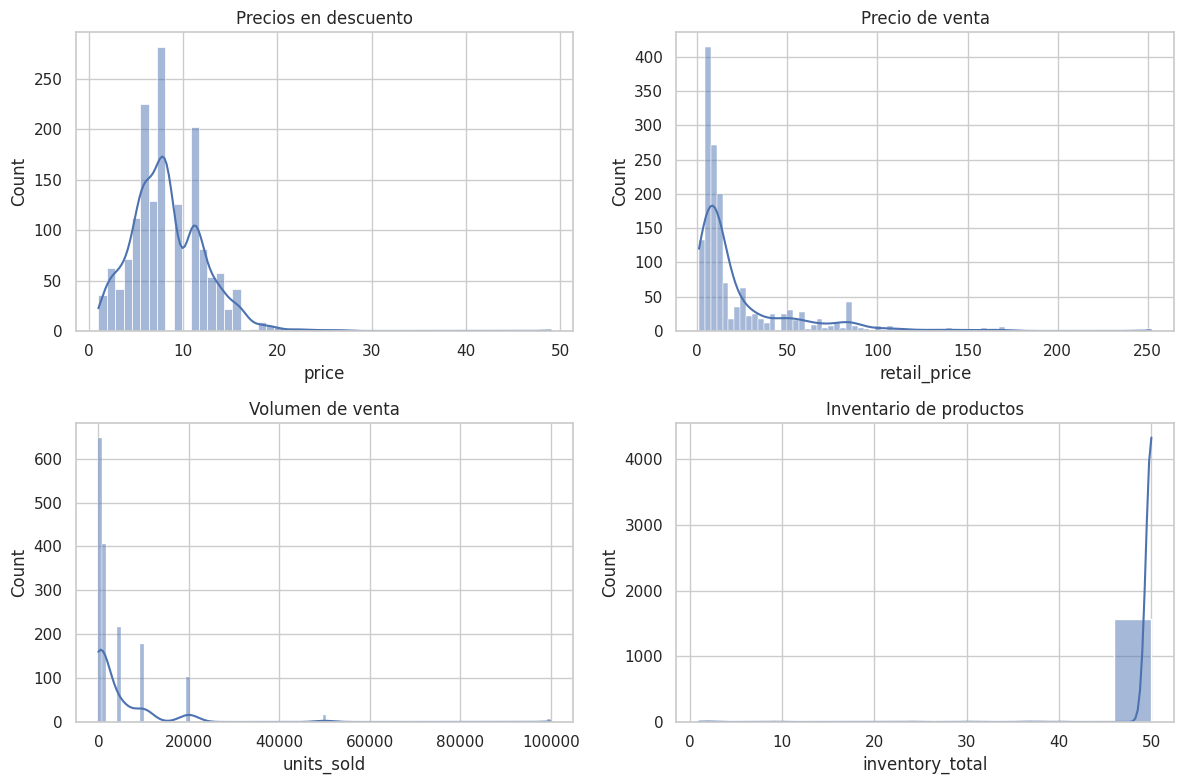

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazar valores infinitos
# Si se encuentran valores infinitos, reemplácelos con NaN,
# y luego manejarlos como manejaría los valores faltantes.
data_sp2.replace([np.inf, -np.inf], np.nan, inplace=True)
data_sp2.dropna(inplace=True)

# Establecer estilo de trama
sns.set(style="whitegrid")

# Histogramas de edad, horas de estudio, puntuaciones de Python y DB
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=data_sp2['price'], kde=True, ax=ax[0, 0]).set(title='Precios en descuento')
sns.histplot(data=data_sp2['retail_price'], kde=True, ax=ax[0, 1]).set(title='Precio de venta')
sns.histplot(data=data_sp2['units_sold'], kde=True, ax=ax[1, 0]).set(title='Volumen de venta')
sns.histplot(data=data_sp2['inventory_total'], kde=True, ax=ax[1, 1]).set(title='Inventario de productos')

plt.tight_layout()
plt.show()

### Interpretación de las distribuciones

- Distribución de precios y descuentos: La mayoría de los descuentos se concentran en un rango bajo, y tanto los precios de descuento como los de venta presentan una ligera asimetría positiva. Esto indica que hay más productos con descuentos bajos y precios de venta más accesibles.
- Volumen de ventas: La distribución del volumen de ventas es altamente sesgada hacia la derecha, lo que sugiere que la mayoría de los productos tienen un bajo volumen de ventas, pero existe una pequeña proporción de productos muy populares.
- Inventario: La distribución del inventario también muestra una asimetría positiva, indicando que la mayoría de los productos tienen niveles de inventario bajos.

Es probable que exista una relación entre los precios de descuento y el volumen de ventas. Sería interesante analizar si los descuentos más altos generan mayores ventas.

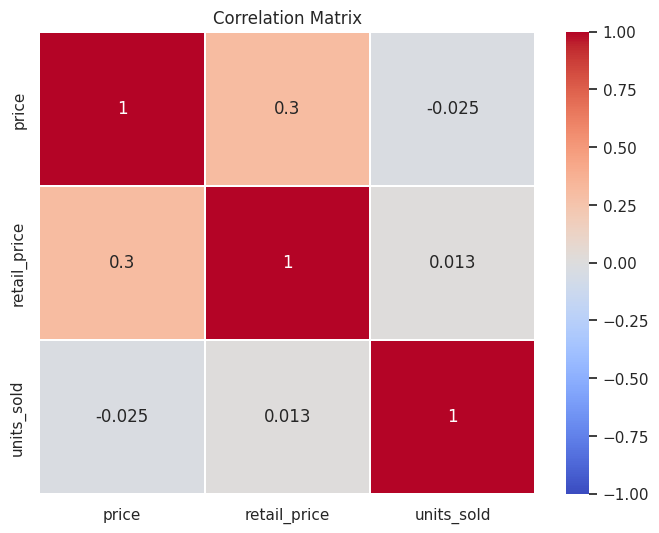

In [90]:
# Matriz de correlación
corr_matrix = data_sp2[['price', 'retail_price', 'units_sold']].corr()

# Trazar el mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

In [93]:
# Tabla de matriz de correlación:
corr_matrix

print('No existe correlación en las variables analizadas.')

No existe correlación en las variables analizadas.


In [99]:
top_product = data_sp2.groupby(['product_id'])['units_sold'].sum().sort_values(ascending=False)
top_product.head(10)

,units_sold
product_id,
567cb0925ff12c4829f07dfb,100000
544b079d1280fa28eee9b380,100000
5b07a7c6e997b33c6f9947da,100000
54bdf18039b8c045f118936a,100000
571adeab62cce546f1a46bc0,100000
53897eeeafddf70c91af1cda,100000
5b17a4cff4979a14e3b4bf7f,50000
58df3eb809730e54ddd932ca,50000
5953892749a5f7756941171f,50000


In [102]:
top_product = data_sp2.groupby(['origin_country'])['units_sold'].sum().sort_values(ascending=False)
top_product.head(10)

,units_sold
origin_country,
CN,6651245
Sin datos,108900
US,43560
SG,20100
GB,1000
VE,350
AT,100


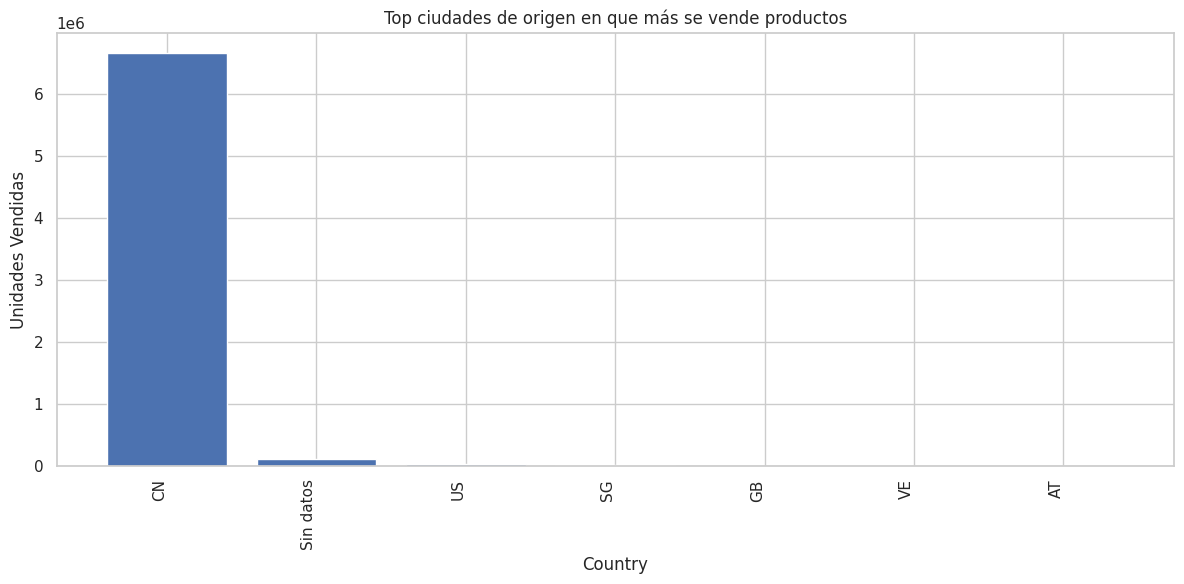

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura para mejor legibilidad
plt.bar(top_product.index, top_product.values)
plt.title('Top ciudades de origen en que más se vende productos')
plt.xlabel('Country')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=90, ha='right')  # Rotar las etiquetas del eje x 90 grados
plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()